What is the distribution of restaurants per location?

In [6]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()


'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT city, COUNT(*) AS restaurant_count
FROM restaurants
GROUP BY city
ORDER BY restaurant_count DESC;
"""

df_city_count = pd.read_sql_query(query, conn)

df_city_count.head(20)


,city,restaurant_count
0,Antwerpen,437
1,Gent,309
2,Bruxelles,264
3,Leuven,174
4,Schaerbeek,110
5,Brugge,96
6,Oostende,85
7,Mechelen,84
8,Anderlecht,84
9,Deurne,56


In [8]:
import sqlite3
import pandas as pd
import folium
from folium.plugins import MarkerCluster

conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT primarySlug, name, city, latitude, longitude, ratings, durationRangeMin, durationRangeMax, deliveryFee
FROM restaurants
WHERE latitude IS NOT NULL AND longitude IS NOT NULL;
"""
df_restaurants = pd.read_sql_query(query, conn)


m = folium.Map(location=[50.85, 4.35], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df_restaurants.iterrows():
    popup_text = f"""
    <b>{row['name']}</b><br>
    City: {row['city']}<br>
    Rating: {row['ratings']}<br>
    Delivery: {row['durationRangeMin']}-{row['durationRangeMax']} min<br>
    Fee: {row['deliveryFee']} €
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)


m.save('delivery_map.html')


Top 10 cities

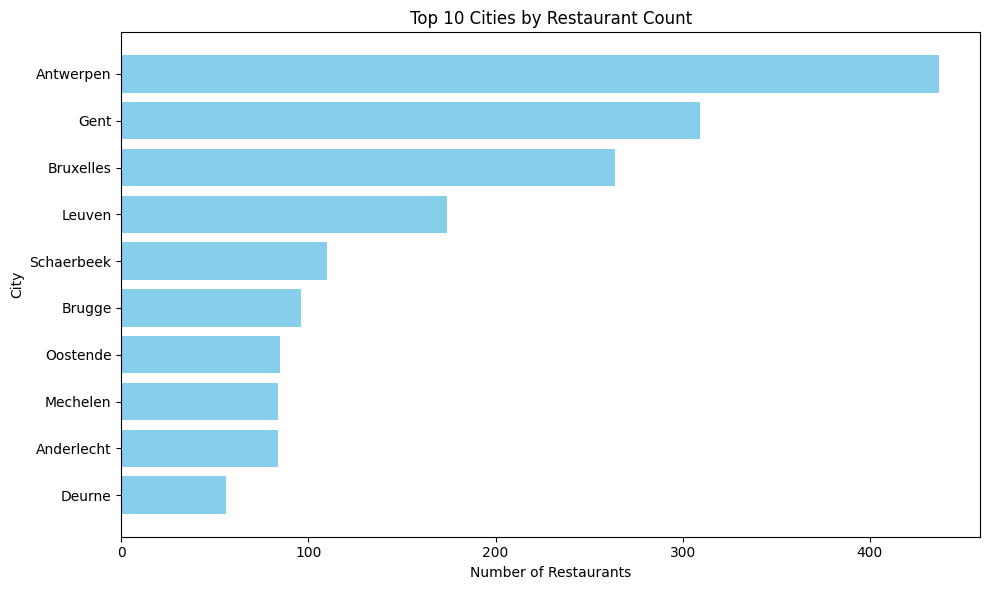

In [15]:

import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT city, COUNT(*) AS restaurant_count
FROM restaurants
GROUP BY city
ORDER BY restaurant_count DESC
LIMIT 10;
"""

df_top10 = pd.read_sql_query(query, conn)
df_top10.head(10)

plt.figure(figsize=(10,6))
plt.barh(df_top10['city'], df_top10['restaurant_count'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top 10 Cities by Restaurant Count')
plt.gca().invert_yaxis()  # En yüksek değer üstte
plt.tight_layout()
plt.show()